# Minimal model for action potential, potassium current and calcium dynamics

- Most of the constants are unphysical, so take with a grain of salt!

In [303]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np 
import matplotlib.pylab as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Currents

In [304]:
def iKChannel(Vm, E,params):
    gCond = 3.
    vDiff = Vm - E
    IV = Vm+90  # very crude approx for IV 
    if IV>10: IV = 10
    iKChannel = gCond * vDiff 
    return iKChannel

def iAP(t):
    scale = -300. # [mA]
    if t>10 and t<15.:
        return scale
    else:
        return 0 
    
def iCaPOpen(Vm):
    V50 = 100.
    n = 4
    pOpen = (1 + (V50/(Vm + 70))**n)**-1 
    return pOpen
    
    
def iCaChannel(Vm, E,params):
    vDiff = Vm - E
    rate = 20.
    iCaChannel = rate * iCaPOpen(Vm)* vDiff 
    return iCaChannel




/Users/peterkekenes-huskey/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in divide


Text(0.5,0,'V')

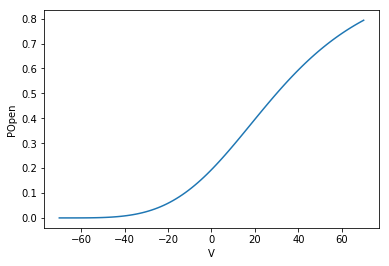

### Ca functions 

In [287]:
def SERCA(caCyto,params):
    Vmax = 0.25   # put into params
    KD = 0.85 # uM
    JSERCA = -Vmax/(1 + (KD/caCyto)**2)
    return JSERCA
    
    
def SRLeak(caCyto,Vm,params):
    rate = 0.2
    if Vm < -50:
      Jleak = rate/(1 + (0.5/0.1)**2)
    else:
      Jleak = 0.
    #print Jleak
    return Jleak    

### Constants 

In [288]:
Ek = -70 # mV
ECa = 0. # mV 
params = None 
Cm = 1.   # 
tEnd = 60.

### ODE integrator 

In [289]:

def dydt(y,t,params):
    P2Y12=0
    Vm, Ca = y
    
# currents, including G-protein dependent K channel activation 
    IK = iKChannel(Vm, Ek,params)
    ICa = iCaChannel(Vm, ECa,params)
    IAP = iAP(t)
    #ICa = iCaChannel(Vm,CaLig,params)
    #ILeak = iLeak(Vm,params)
    
    #INKA = params.INKA;
    conv = 0.005 # i to dCa conv factor 
    JCa = conv *  ICa
    scale = 1.
    JSERCA = scale*SERCA(Ca, params)
    JLeak = scale*SRLeak(Ca,Vm,params)
    
    # Membrane potential 
    dVm_dt = -(IK + ICa + IAP)/Cm;
    dCa_dt = JCa + JSERCA + JLeak
    return dVm_dt, dCa_dt

In [290]:
from scipy.integrate import odeint

## Simulator 

In [291]:

ts = np.linspace(0,tEnd,1000)
Vm = -70 # mV
Ca = 0.15 # uM 
y0 = [Vm, Ca] # , rhoKchannel,Gprot,CaLig,Ca]


ys = odeint(dydt,y0,ts,args=(params,))

/Users/peterkekenes-huskey/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in double_scalars


### Plot results of P Open



In [ ]:
Vs = np.linspace(-70, 70,100)
plt.plot(Vs,iCaPOpen(Vs))
plt.ylabel("POpen")
plt.xlabel("V")

### Plot simulation results 

Text(0,0.5,'Ca')

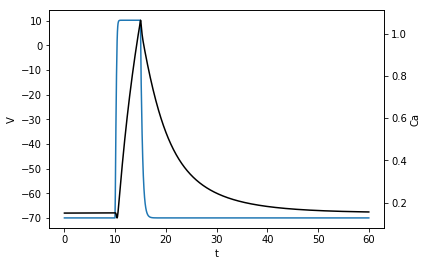

In [298]:
fig,ax = plt.subplots(1)
ax.plot(ts, ys[:,0 ])
ax.set_ylabel("V")
ax.set_xlabel("t")

axr = ax.twinx()
axr.plot(ts,ys[:,1],"k")
plt.ylabel("Ca")